<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%202/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Data Wrangling

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Handle missing values
*   Correct data format
*   Standardize and normalize data


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="https://#identify_handle_missing_values">Identify and handle missing values</a>
        <ul>
            <li><a href="https://#identify_missing_values">Identify missing values</a></li>
            <li><a href="https://#deal_missing_values">Deal with missing values</a></li>
            <li><a href="https://#correct_data_format">Correct data format</a></li>
        </ul>
    </li>
    <li><a href="https://#data_standardization">Data standardization</a></li>
    <li><a href="https://#data_normalization">Data normalization (centering/scaling)</a></li>
    <li><a href="https://#binning">Binning</a></li>
    <li><a href="https://#indicator">Indicator variable</a></li>
    <li><a href="https://#resample">Resample data</a></li>
</ul>

</div>

<hr>


<h2>What is the purpose of data wrangling?</h2>


Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.


<h3>What is the Avarage price of DOGEcoin in different currency?</h3>

<h3>Import data</h3>
<p>
You can find the "DOGEBUSD trades Dataset" from the following link: <a href="https://1824251045.rsc.cdn77.org/web/algohouse/data/DOGEBUSD_trades_1m.csv</a>. 
We will be using this dataset throughout this course.
</p>


<h4>Import pandas</h4> 


you are running the lab in your  browser, so we will install the libraries using `piplite`


In [1]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])

If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:


In [2]:
#If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2


In [3]:
import pandas as pd
import matplotlib.pylab as plt
#set values precision as 6
pd.set_option("display.precision", 6)

This function will download the dataset into your browser


In [4]:
#This function will download the dataset into your browser 
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())



<h2>Reading the dataset from the URL and adding the related headers</h2>


First, we assign the URL of the dataset to "filename".


This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/corsera_da0101en_notebook_bottom?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">HERE</a> for free storage.


In [5]:
filename = "https://1824251045.rsc.cdn77.org/web/algohouse/data/DOGEBUSD_trades_1m.csv"

Then, we create a Python list <b>headers</b> containing name of headers.


In [6]:
headers = ["Ts", "Open", "High", "Low", "Close", "Volume", "Rec_count", "Avg_price"]

you will need to download the dataset; if you are running locally, please comment out the following


In [7]:
await download(filename, "DOGEBUSD_trades_1m.csv")
filename="DOGEBUSD_trades_1m.csv"

Use the Pandas method <b>read_csv()</b> to load the data from the web address. Set the parameter  "names" equal to the Python list "headers".


In [8]:
clear_df = pd.read_csv(filename, index_col=0, names = headers, skiprows = 1)

Use the method <b>head()</b> to display the first five rows of the dataframe.


In [9]:
# To see what the data set looks like, we'll use the head() method.
clear_df.head()

,Ts,Open,High,Low,Close,Volume,Rec_count,Avg_price
0,2022-11-11 14:38:00,0.08139,0.08139,0.08065,0.08065,4523754.0,80,0.080926
1,2022-11-11 14:39:00,0.08065,0.08078,0.08041,0.08043,5119775.0,77,0.080565
2,2022-11-11 14:40:00,0.08039,0.08073,0.08035,0.08056,1460872.0,65,0.080577
3,2022-11-11 14:41:00,0.08058,0.08103,0.08032,0.08092,2292152.0,75,0.080715
4,2022-11-11 14:42:00,0.08099,0.08112,0.08071,0.08071,3044077.0,57,0.081038


<h2>Making some values in dataframe wrong</h2>

<div>Let try to hurt our data.</div> 

<div>Firs of all, let's make copy of our dataframe:</div>


In [10]:
df = pd.DataFrame(clear_df)
df.head()

,Ts,Open,High,Low,Close,Volume,Rec_count,Avg_price
0,2022-11-11 14:38:00,0.08139,0.08139,0.08065,0.08065,4523754.0,80,0.080926
1,2022-11-11 14:39:00,0.08065,0.08078,0.08041,0.08043,5119775.0,77,0.080565
2,2022-11-11 14:40:00,0.08039,0.08073,0.08035,0.08056,1460872.0,65,0.080577
3,2022-11-11 14:41:00,0.08058,0.08103,0.08032,0.08092,2292152.0,75,0.080715
4,2022-11-11 14:42:00,0.08099,0.08112,0.08071,0.08071,3044077.0,57,0.081038


In [11]:
import numpy as np

def hurt_data(df:pd.DataFrame):
    columns = ['Close', 'Avg_price', 'Rec_count']
    
    for column in columns:
        m = np.random.rand(len(df))
        l1 = 0.1 # ?
        l2 = 0.05 # Text
        l3 = 0.05 # Negative
        
        mask1 = m < l1 # NaN
        mask2 = (m >= l1) & (m < l1+l2) # Text
        mask3 = (m >= l1+l2) & (m < l1+l2+l3) # Negative
    
        df.loc[mask1, column] = "?"
        df.loc[mask2, column] = "Error"
        df.loc[mask3, column] = - df.loc[mask3, column]
    
    return df

df = hurt_data(clear_df)
clear_df = pd.read_csv(filename, index_col=0, names = headers, skiprows = 1)

<h2>Reading the dataset from the URL and adding the related headers</h2>
As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis.


<div>So, how do we identify all those missing values and deal with them?</div> 


<b>How to work with missing data?</b>

Steps for working with missing data:

<ol>
    <li>Identify missing data</li>
    <li>Deal with missing data</li>
    <li>Correct data format</li>
</ol>


<h2 id="identify_handle_missing_values">Identify and handle missing values</h2>

<h3 id="identify_missing_values">Identify missing values</h3>
<h4>Convert missed or wrong data to NaN</h4>
In the trades dataset, missing data comes with the question mark "?", text or negative values.
We replace that with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Here we use the function: 
 <pre>.replace(A, B, inplace = True) </pre>
 to replace A by B or
 <pre>.mask(condition, new value, inplace = True)</pre>
 to change value by some condition.


In [12]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)

# replace all values with letters to NaN
df.replace(r'^([A-Za-z]|_)+$', np.NaN, regex=True, inplace = True)

# replace Negative values to NaN
columns = ['Close', 'Avg_price', 'Rec_count']
for column in columns:
    df.astype({column : 'float'})
    df[column].mask(df[column] < 0, np.NaN, inplace = True)
    
df.head(20)

,Ts,Open,High,Low,Close,Volume,Rec_count,Avg_price
0,2022-11-11 14:38:00,0.08139,0.08139,0.08065,0.08065,4523754.0,80.0,0.080926
1,2022-11-11 14:39:00,0.08065,0.08078,0.08041,0.08043,5119775.0,77.0,0.080565
2,2022-11-11 14:40:00,0.08039,0.08073,0.08035,0.08056,1460872.0,NaN,NaN
3,2022-11-11 14:41:00,0.08058,0.08103,0.08032,0.08092,2292152.0,75.0,0.080715
4,2022-11-11 14:42:00,0.08099,0.08112,0.08071,0.08071,3044077.0,57.0,0.081038
5,2022-11-11 14:43:00,0.08071,0.08105,0.08066,0.08078,1476278.0,66.0,NaN
6,2022-11-11 14:44:00,0.08083,0.08111,0.08083,0.08111,1838426.0,60.0,0.081012
7,2022-11-11 14:45:00,0.08110,0.08232,0.08109,0.08226,13747027.0,100.0,0.081842
8,2022-11-11 14:46:00,0.08237,0.08275,0.08199,NaN,12758340.0,93.0,0.082308
9,2022-11-11 14:47:00,0.08276,0.08612,0.08275,NaN,34452376.0,105.0,0.084556


<h4>Evaluating for Missing Data</h4>

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [13]:
missing_data = df.isnull()
missing_data.head(5)

,Ts,Open,High,Low,Close,Volume,Rec_count,Avg_price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


"True" means the value is a missing value while "False" means the value is not a missing value.


<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset.  In the body of the for loop the method ".value_counts()" counts the number of "True" values. 
</p>


In [14]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Ts
False    67277
Name: Ts, dtype: int64

Open
False    67277
Name: Open, dtype: int64

High
False    67277
Name: High, dtype: int64

Low
False    67277
Name: Low, dtype: int64

Close
False    53803
True     13474
Name: Close, dtype: int64

Volume
False    67277
Name: Volume, dtype: int64

Rec_count
False    53971
True     13306
Name: Rec_count, dtype: int64

Avg_price
False    53875
True     13402
Name: Avg_price, dtype: int64



Based on the summary above, each column has 67277 rows of data and eight of the columns containing missing data:

<ol>
    <li>"Close" : +-13373 missing data</li>
    <li>"Rec_count":  +-13546 missing data</li>
    <li>"Avg_price": +-13356 missing data</li>
</ol>


<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. 

Our data is linked to time, so we can not drop rows to save data quality for future analysis. Also not the best way to restore our data is to replace it by mean value.
So we will use a frequency value and an interpolation to restore it.
<ol>
<b>Replace by using interpolation: </b>
<ul>
    <li>"Avg_price": +-13356 missing data, simply delete the whole row.</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"Rec_count":  +-13546 missing data, replace them with the most frequent value.</li>
</ul>
</ol>



<h4>Lets compare some models for interpolation to choose the best one:</h4>


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

res = pd.DataFrame({"Model":[], "Accuracy":[], "Percentage":[]})

#list of interpolation methods
models = ["linear", "nearest", "slinearl", "quadratic", "cubic", "piecewise_polynomial", "pchip", "akima", "cubicspline"]
for model in models:
    #count nan rows to check accuracy then
    nan_rows = df["Avg_price"].isna()
    #use interpolation on Avg_price column
    interpolation_check = df["Avg_price"].interpolate(model = model)
    #check absolute and squaded errors
    accuracy = mean_squared_error(clear_df.loc[nan_rows, "Avg_price"], interpolation_check[nan_rows])
    percentage = mean_absolute_percentage_error(clear_df.loc[nan_rows, "Avg_price"], interpolation_check[nan_rows])
    #add results to res list
    res.loc[len(res.index)] = [model, accuracy, percentage]
    
#list of interpolation methods
more_models = ["spline", "polynomial"]
for model in more_models:
    for order in [3, 5]:
        #count nan rows to check accuracy then
        nan_rows = df["Avg_price"].isna() 
        #use interpolation on Avg_price column
        interpolation_check = df["Avg_price"].interpolate(model = model, order = order)
        #check absolute and squaded errors
        accuracy = mean_squared_error(clear_df.loc[nan_rows, "Avg_price"], interpolation_check[nan_rows])
        percentage = mean_absolute_percentage_error(clear_df.loc[nan_rows, "Avg_price"], interpolation_check[nan_rows])
        #add results to res list
        res.loc[len(res.index)] = [f"{model}_{order}", accuracy, percentage]
        
#set output precision on 15 digits
pd.set_option("display.precision", 15)
res.sort_values(by = ["Percentage", "Accuracy"], ascending = True)
#convert Percentage to %
res["Percentage"] = res["Percentage"] * 100
res["Percentage"] = res["Percentage"].astype("str")
res["Percentage"] = res["Percentage"].str.slice(stop = 8) + "%" 
res.head(11)

,Model,Accuracy,Percentage
0,linear,0.000000007317778,0.055864%
1,nearest,0.000000007317778,0.055864%
2,slinearl,0.000000007317778,0.055864%
3,quadratic,0.000000007317778,0.055864%
4,cubic,0.000000007317778,0.055864%
5,piecewise_polynomial,0.000000007317778,0.055864%
6,pchip,0.000000007317778,0.055864%
7,akima,0.000000007317778,0.055864%
8,cubicspline,0.000000007317778,0.055864%
9,spline_3,0.000000007317778,0.055864%


In [16]:
#set output precision on 6 digits
pd.set_option("display.precision", 6)

Accuracy is same so lets choose linear interpolation for example.

<h4>Replace "NaN" with the linear value in the "Avg_price" column</h4>


In [17]:
df["Avg_price"].interpolate(method='linear', inplace=True)
df.head(5)

,Ts,Open,High,Low,Close,Volume,Rec_count,Avg_price
0,2022-11-11 14:38:00,0.08139,0.08139,0.08065,0.08065,4523754.0,80.0,0.080926
1,2022-11-11 14:39:00,0.08065,0.08078,0.08041,0.08043,5119775.0,77.0,0.080565
2,2022-11-11 14:40:00,0.08039,0.08073,0.08035,0.08056,1460872.0,NaN,0.080640
3,2022-11-11 14:41:00,0.08058,0.08103,0.08032,0.08092,2292152.0,75.0,0.080715
4,2022-11-11 14:42:00,0.08099,0.08112,0.08071,0.08071,3044077.0,57.0,0.081038


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1: </h1>

<b>Based on the example above, replace NaN in "Close" column with the linear interpolation value.</b>

</div>


In [18]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python

# replace NaN by with the linear interpolation value in "Close" column
df["Close"].interpolate(method='linear', inplace=True)
df.head(5)

```
</details>


To see which values are present in a particular column, we can use the ".value_counts()" method:


In [19]:
df['Rec_count'].value_counts()

12.0     1712
13.0     1677
15.0     1643
11.0     1638
14.0     1616
         ... 
118.0       3
115.0       2
114.0       1
113.0       1
119.0       1
Name: Rec_count, Length: 118, dtype: int64

We can see the most common value. We can also use the ".idxmax()" method to calculate the most common type automatically:


In [20]:
df['Rec_count'].value_counts().idxmax()

12.0

The replacement procedure is very similar to what we have seen previously:


In [21]:
#replace the missing 'Rec_count' values by the most frequent 
df["Rec_count"].replace(np.nan, df['Rec_count'].value_counts().idxmax(), inplace=True)

In [22]:
df.head()

,Ts,Open,High,Low,Close,Volume,Rec_count,Avg_price
0,2022-11-11 14:38:00,0.08139,0.08139,0.08065,0.08065,4523754.0,80.0,0.080926
1,2022-11-11 14:39:00,0.08065,0.08078,0.08041,0.08043,5119775.0,77.0,0.080565
2,2022-11-11 14:40:00,0.08039,0.08073,0.08035,0.08056,1460872.0,12.0,0.080640
3,2022-11-11 14:41:00,0.08058,0.08103,0.08032,0.08092,2292152.0,75.0,0.080715
4,2022-11-11 14:42:00,0.08099,0.08112,0.08071,0.08071,3044077.0,57.0,0.081038


<b>Good!</b> Now, we have a dataset with no missing values.


<h3 id="correct_data_format">Correct data format</h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use:

<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>


<h4>Let's list the data types for each column</h4>


In [23]:
df.dtypes

Ts            object
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
Rec_count    float64
Avg_price    float64
dtype: object

<p>As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.</p> 


<h4>Convert data types to proper format</h4>


In [24]:
df[["Ts"]] = df[["Ts"]].astype("datetime64[ns]")
df[["Rec_count"]] = df[["Rec_count"]].astype("int64")

<h4>Let us list the columns after the conversion</h4>


In [25]:
df.dtypes

Ts           datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume              float64
Rec_count             int64
Avg_price           float64
dtype: object

<b>Wonderful!</b>

Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.


<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)
</p>

<b>What is standardization?</b>

<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example</b>

<p>Transform USD to EUR:</p>
<p>In our dataset, the columns with price values are represented by BUSD. Assume we are developing an application in a country that accepts the price values with EUR standard.</p>
<p>We will need to apply <b>data transformation</b> to transform BUSD into EUR.</p>


In [26]:
df.head()

,Ts,Open,High,Low,Close,Volume,Rec_count,Avg_price
0,2022-11-11 14:38:00,0.08139,0.08139,0.08065,0.08065,4523754.0,80,0.080926
1,2022-11-11 14:39:00,0.08065,0.08078,0.08041,0.08043,5119775.0,77,0.080565
2,2022-11-11 14:40:00,0.08039,0.08073,0.08035,0.08056,1460872.0,12,0.080640
3,2022-11-11 14:41:00,0.08058,0.08103,0.08032,0.08092,2292152.0,75,0.080715
4,2022-11-11 14:42:00,0.08099,0.08112,0.08071,0.08071,3044077.0,57,0.081038


In [27]:
# Convert BUSD to EUR by mathematical operation
res = await pyfetch("https://api.binance.com/sapi/v1/convert/exchangeInfo?fromAsset=BUSD&toAsset=EUR")
# If the api is unavailable we set fixed rate
# If we can not get info(statuse code is not 200) we use coef 0.92
if res.status != 200:
    rate = 0.92
else:
    # Converting json to dict
    res = await res.json()
    rate = float(res[0]["toAssetMinAmount"])
    
print(f"The exchange rate is 1 BUSD = {rate} EUR")

cols_to_convert = ["Open", "High", "Low", "Close", "Volume", "Avg_price"]
for col in cols_to_convert:
    df[f"{col}_EUR"] = df[col] * rate

# check your transformed data 
df.head()

The exchange rate is 1 BUSD = 0.92 EUR


,Ts,Open,High,Low,Close,Volume,Rec_count,Avg_price,Open_EUR,High_EUR,Low_EUR,Close_EUR,Volume_EUR,Avg_price_EUR
0,2022-11-11 14:38:00,0.08139,0.08139,0.08065,0.08065,4523754.0,80,0.080926,0.074879,0.074879,0.074198,0.074198,4161853.68,0.074452
1,2022-11-11 14:39:00,0.08065,0.08078,0.08041,0.08043,5119775.0,77,0.080565,0.074198,0.074318,0.073977,0.073996,4710193.00,0.074120
2,2022-11-11 14:40:00,0.08039,0.08073,0.08035,0.08056,1460872.0,12,0.080640,0.073959,0.074272,0.073922,0.074115,1344002.24,0.074189
3,2022-11-11 14:41:00,0.08058,0.08103,0.08032,0.08092,2292152.0,75,0.080715,0.074134,0.074548,0.073894,0.074446,2108779.84,0.074258
4,2022-11-11 14:42:00,0.08099,0.08112,0.08071,0.08071,3044077.0,57,0.081038,0.074511,0.074630,0.074253,0.074253,2800550.84,0.074555


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<b>According to the example above, transform BUSD to GBP in "Avg_price" column and change the name of columns in appropriative way.</b>

</div>


In [28]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
# transform USD to Chinese Yuan by mathematical operation (USD divided by 0.15)
# Convert BUSD to EUR by mathematical operation

res = await pyfetch("https://api.binance.com/sapi/v1/convert/exchangeInfo?fromAsset=BUSD&toAsset=GBP")
# If the api is unavailable we set fixed rate
if res.status != 200:
    rate = 0.81
else:
    # Converting json to dict
    res = await res.json()
    rate = float(res[0]["toAssetMinAmount"])
    
print(f"The exchange rate is 1 BUSD = {rate} GBP")

cols_to_convert = ["Open", "High", "Low", "Close", "Volume", "Avg_price"]
for col in cols_to_convert:
    df[f"{col}_GBP"] = df[col] * rate

# check your transformed data 
df.head()

```

</details>


<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>

<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.
</p>

<b>Example</b>

<p>To demonstrate normalization, let's say we want to scale the columns "Open" and "Close".</p>
<p><b>Target:</b> would like to normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>


In [29]:
df.head(10)

,Ts,Open,High,Low,Close,Volume,Rec_count,Avg_price,Open_EUR,High_EUR,Low_EUR,Close_EUR,Volume_EUR,Avg_price_EUR
0,2022-11-11 14:38:00,0.08139,0.08139,0.08065,0.08065,4523754.0,80,0.080926,0.074879,0.074879,0.074198,0.074198,4161853.68,0.074452
1,2022-11-11 14:39:00,0.08065,0.08078,0.08041,0.08043,5119775.0,77,0.080565,0.074198,0.074318,0.073977,0.073996,4710193.00,0.074120
2,2022-11-11 14:40:00,0.08039,0.08073,0.08035,0.08056,1460872.0,12,0.080640,0.073959,0.074272,0.073922,0.074115,1344002.24,0.074189
3,2022-11-11 14:41:00,0.08058,0.08103,0.08032,0.08092,2292152.0,75,0.080715,0.074134,0.074548,0.073894,0.074446,2108779.84,0.074258
4,2022-11-11 14:42:00,0.08099,0.08112,0.08071,0.08071,3044077.0,57,0.081038,0.074511,0.074630,0.074253,0.074253,2800550.84,0.074555
5,2022-11-11 14:43:00,0.08071,0.08105,0.08066,0.08078,1476278.0,66,0.081025,0.074253,0.074566,0.074207,0.074318,1358175.76,0.074543
6,2022-11-11 14:44:00,0.08083,0.08111,0.08083,0.08111,1838426.0,60,0.081012,0.074364,0.074621,0.074364,0.074621,1691351.92,0.074531
7,2022-11-11 14:45:00,0.08110,0.08232,0.08109,0.08226,13747027.0,100,0.081842,0.074612,0.075734,0.074603,0.075679,12647264.84,0.075295
8,2022-11-11 14:46:00,0.08237,0.08275,0.08199,NaN,12758340.0,93,0.082308,0.075780,0.076130,0.075431,NaN,11737672.80,0.075723
9,2022-11-11 14:47:00,0.08276,0.08612,0.08275,NaN,34452376.0,105,0.084556,0.076139,0.079230,0.076130,NaN,31696185.92,0.077791


In [30]:
# replace (original value) by (original value)/(maximum value)
df['Open'] = df['Open']/df['Open'].max()
df['Close'] = df['Close']/df['Close'].max()
df.head(10)

,Ts,Open,High,Low,Close,Volume,Rec_count,Avg_price,Open_EUR,High_EUR,Low_EUR,Close_EUR,Volume_EUR,Avg_price_EUR
0,2022-11-11 14:38:00,0.729236,0.08139,0.08065,0.722800,4523754.0,80,0.080926,0.074879,0.074879,0.074198,0.074198,4161853.68,0.074452
1,2022-11-11 14:39:00,0.722606,0.08078,0.08041,0.720828,5119775.0,77,0.080565,0.074198,0.074318,0.073977,0.073996,4710193.00,0.074120
2,2022-11-11 14:40:00,0.720276,0.08073,0.08035,0.721993,1460872.0,12,0.080640,0.073959,0.074272,0.073922,0.074115,1344002.24,0.074189
3,2022-11-11 14:41:00,0.721978,0.08103,0.08032,0.725220,2292152.0,75,0.080715,0.074134,0.074548,0.073894,0.074446,2108779.84,0.074258
4,2022-11-11 14:42:00,0.725652,0.08112,0.08071,0.723338,3044077.0,57,0.081038,0.074511,0.074630,0.074253,0.074253,2800550.84,0.074555
5,2022-11-11 14:43:00,0.723143,0.08105,0.08066,0.723965,1476278.0,66,0.081025,0.074253,0.074566,0.074207,0.074318,1358175.76,0.074543
6,2022-11-11 14:44:00,0.724218,0.08111,0.08083,0.726922,1838426.0,60,0.081012,0.074364,0.074621,0.074364,0.074621,1691351.92,0.074531
7,2022-11-11 14:45:00,0.726637,0.08232,0.08109,0.737229,13747027.0,100,0.081842,0.074612,0.075734,0.074603,0.075679,12647264.84,0.075295
8,2022-11-11 14:46:00,0.738016,0.08275,0.08199,NaN,12758340.0,93,0.082308,0.075780,0.076130,0.075431,NaN,11737672.80,0.075723
9,2022-11-11 14:47:00,0.741511,0.08612,0.08275,NaN,34452376.0,105,0.084556,0.076139,0.079230,0.076130,NaN,31696185.92,0.077791


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #3: </h1>

<b>According to the example above, normalize the column "Avg_price".</b>

</div>


In [31]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
df['Avg_price'] = df['Avg_price']/df['Avg_price'].max() 

# show the scaled columns
df[["Open","Close","Avg_price"]].head()


```

</details>


Here we can see we've normalized "Open", "Close" and "Avg_price" in the range of \[0,1].


<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "Avg_price" is a real valued variable ranging from 0.06942347 to 0.11118615 and it has a lot unique values. What if we only care about the price difference between DOGE in diapasone with high Avg_price, medium Avg_price, and little Avg_price (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the pandas method 'cut' to segment the 'Avg_price' column into 3 bins.</p>


<h3>Example of Binning Data In Pandas</h3>


Convert data to correct format:


In [32]:
df["Avg_price"]=df["Avg_price"].astype(float, copy=True)

Let's plot the histogram of Avg_price to see what the distribution of Avg_price looks like.


Text(0.5, 1.0, 'Avg_price bins')

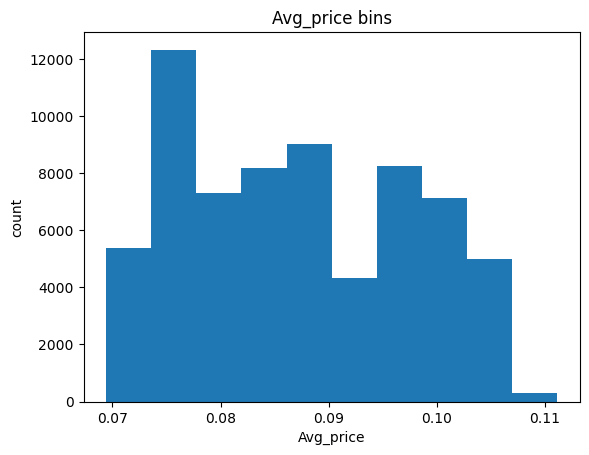

In [33]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Avg_price"])

# set x/y labels and plot title
plt.pyplot.xlabel("Avg_price")
plt.pyplot.ylabel("count")
plt.pyplot.title("Avg_price bins")

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of Avg_price, we want to set start_value = min(df["Avg_price"]).</p>
<p>Since we want to include the maximum value of Avg_price, we want to set end_value = max(df["Avg_price"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.</p>


We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.


In [34]:
bins = np.linspace(min(df["Avg_price"]), max(df["Avg_price"]), 4)
bins

array([0.06942347, 0.08332873, 0.09723398, 0.11113923])

We set group  names:


In [35]:
group_names = ['Low', 'Medium', 'High']

We apply the function "cut" to determine what each value of `df['Avg_price']` belongs to.


In [36]:
df['Avg_price-binned'] = pd.cut(df['Avg_price'], bins, labels=group_names, include_lowest=True )
df[['Avg_price','Avg_price-binned']].head(20)

,Avg_price,Avg_price-binned
0,0.080926,Low
1,0.080565,Low
2,0.080640,Low
3,0.080715,Low
4,0.081038,Low
5,0.081025,Low
6,0.081012,Low
7,0.081842,Low
8,0.082308,Low
9,0.084556,Medium


Let's see the number of data in each bin:


In [37]:
df["Avg_price-binned"].value_counts()

Low       26798
Medium    26441
High      14038
Name: Avg_price-binned, dtype: int64

Let's plot the distribution of each bin:


Text(0.5, 1.0, 'Avg_price bins')

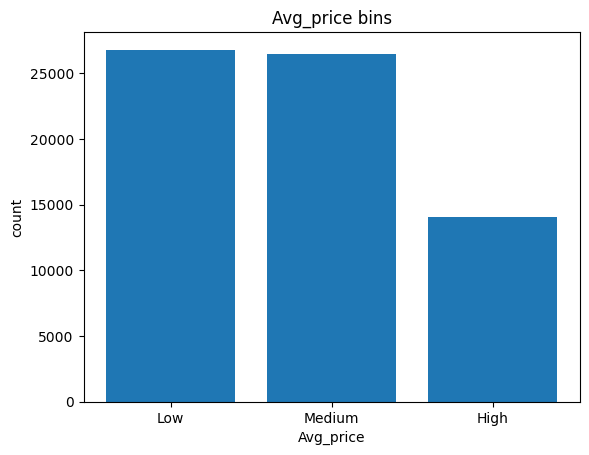

In [38]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["Avg_price-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Avg_price")
plt.pyplot.ylabel("count")
plt.pyplot.title("Avg_price bins")

<p>
    Look at the dataframe above carefully. You will find that the last column provides the bins for "Avg_price" based on 3 categories ("Low", "Medium" and "High"). 
</p>
<p>
    We successfully narrowed down the intervals to only 3!
</p>


<h3>Bins Visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 


Text(0.5, 1.0, 'Avg_price bins')

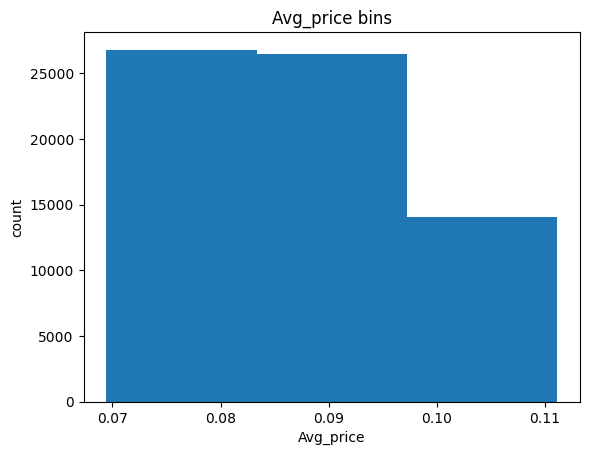

In [39]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["Avg_price"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("Avg_price")
plt.pyplot.ylabel("count")
plt.pyplot.title("Avg_price bins")

The plot above shows the binning result for the attribute "Avg_price".


<h2 id="indicator">Indicator Variable (or Dummy Variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>

<p>
    We use indicator variables so we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "Avg_price" has three unique values: "Low", "Medium" or "High". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "Avg_price" to indicator variables.
</p>

<p>
    We will use pandas' method 'get_dummies' to assign numerical values to different categories of Avg_price. 
</p>


In [40]:
df.columns

Index(['Ts', 'Open', 'High', 'Low', 'Close', 'Volume', 'Rec_count',
       'Avg_price', 'Open_EUR', 'High_EUR', 'Low_EUR', 'Close_EUR',
       'Volume_EUR', 'Avg_price_EUR', 'Avg_price-binned'],
      dtype='object')

Get the indicator variables and assign it to data frame "dummy_variable\_1":


In [41]:
dummy_variable_1 = pd.get_dummies(df["Avg_price-binned"])
dummy_variable_1.head(5)

,Low,Medium,High
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Change the column names for clarity:


In [42]:
dummy_variable_1.rename(columns={'Low':'Avg_price-Low', 'Medium':'Avg_price-Medium', 'High':'Avg_price-High'}, inplace=True)
dummy_variable_1.head()

,Avg_price-Low,Avg_price-Medium,Avg_price-High
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In the dataframe, column 'Avg_price' has values for 'Low', 'Medium' and 'High' as 0s and 1s now.


In [43]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "Avg_price" from "df"
df.drop("Avg_price", axis = 1, inplace=True)

In [44]:
df.head()

,Ts,Open,High,Low,Close,Volume,Rec_count,Open_EUR,High_EUR,Low_EUR,Close_EUR,Volume_EUR,Avg_price_EUR,Avg_price-binned,Avg_price-Low,Avg_price-Medium,Avg_price-High
0,2022-11-11 14:38:00,0.729236,0.08139,0.08065,0.722800,4523754.0,80,0.074879,0.074879,0.074198,0.074198,4161853.68,0.074452,Low,1,0,0
1,2022-11-11 14:39:00,0.722606,0.08078,0.08041,0.720828,5119775.0,77,0.074198,0.074318,0.073977,0.073996,4710193.00,0.074120,Low,1,0,0
2,2022-11-11 14:40:00,0.720276,0.08073,0.08035,0.721993,1460872.0,12,0.073959,0.074272,0.073922,0.074115,1344002.24,0.074189,Low,1,0,0
3,2022-11-11 14:41:00,0.721978,0.08103,0.08032,0.725220,2292152.0,75,0.074134,0.074548,0.073894,0.074446,2108779.84,0.074258,Low,1,0,0
4,2022-11-11 14:42:00,0.725652,0.08112,0.08071,0.723338,3044077.0,57,0.074511,0.074630,0.074253,0.074253,2800550.84,0.074555,Low,1,0,0


The last two columns are now the indicator variable representation of the Avg_price variable. They're all 0s and 1s now.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>

<b>Similar to before, create an indicator variable for the column "Ts"</b>

</div>


In [45]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
# get day name
day = df.Ts
df['Day_name'] = day.df.day_name()

# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['Day_name'])

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()


```

</details>


<h2 id="resample">Resample time series data</h2>


Resampling is a series of techniques used in statistics to gather more information about a sample. This can include retaking a sample or estimating its accuracy. With these additional techniques, resampling often improves the overall accuracy and estimates any uncertainty within a population.

In [46]:
#create new dataset
wdf = pd.DataFrame()
#set time as index
df['Ts'] = pd.to_datetime(df['Ts'])
df.set_index('Ts', inplace=True)

Find summary Rec_count per week:

In [47]:
wdf['Open'] = df['Open'].resample('D').first()
wdf['High'] = df['High'].resample('D').max()
wdf['Low'] = df['Low'].resample('D').min()
wdf['Close'] = df['Close'].resample('D').last()
wdf['Volume'] = df['Volume'].resample('D').sum()

In [48]:
wdf.head()

,Open,High,Low,Close,Volume
Ts,,,,,
2022-11-11,0.729236,0.08612,0.08032,0.760620,8.364019e+08
2022-11-12,0.760595,0.09480,0.07826,0.788403,3.540683e+09
2022-11-13,0.787922,0.09139,0.08263,0.760172,2.076049e+09
2022-11-14,0.759968,0.09120,0.07900,0.767700,2.686225e+09
2022-11-15,0.768211,0.08950,0.08465,0.778993,1.277553e+09


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5: </h1>

<b>Make a daily summary of Rec_count_eur.</b>

</div>


In [49]:
# Write your code below and press Shift+Enter to execute 



<details><summary>Click here for the solution</summary>

```python
nwdf = pd.DataFrame()
nwdf['Open'] = df['Open'].resample('D').first()
nwdf['High'] = df['High'].resample('D').max()
nwdf['Low'] = df['Low'].resample('D').min()
nwdf['Close'] = df['Close'].resample('D').last()
nwdf['Volume'] = df = pd.DataFrame()wdf['Volume'].resample('D').sum()
nwdf.head()

```

</details>


In [50]:
wdf.to_csv('clean_df.csv')

Save the new csv:

> Note : The  csv file cannot be viewed in the jupyterlite based SN labs environment.However you can Click <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%202/DA0101EN-2-Review-Data-Wrangling.ipynb?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">HERE</a> to download the lab notebook (.ipynb) to your local machine and view the csv file once the notebook is executed.


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Fiorella Wenver</a>

<a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

Lozovyi Oleg

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                  |
| ----------------- | ------- | ---------- | ----------------------------------- |
| 2022-04-22        | 2.3     | Lakshmi    | Made changes in markdown file       |
| 2020-10-30        | 2.2     | Lakshmi    | Changed URL of csv                  |
| 2020-09-09        | 2.1     | Lakshmi    | Updated Indicator Variables section |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab  |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
